In [26]:
from MLP import *

import numpy as np
import matplotlib.pyplot as plt

In [43]:
x_train = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
y_train = np.array([[1, 2], [3, 4], [5, 6]])

Epoch 200, loss=0.001058
Epoch 400, loss=0.000011
Epoch 600, loss=0.000000
Epoch 800, loss=0.000000
Epoch 1000, loss=0.000000
Epoch 1200, loss=0.000000
Epoch 1400, loss=0.000000
Epoch 1600, loss=0.000000
Epoch 1800, loss=0.000000
Epoch 2000, loss=0.000000


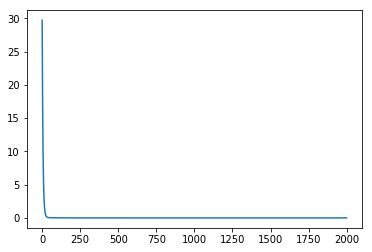

[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [44]:
input_size = 3
output_size = 2
lr = 1e-2
num_epoch = 2000
net = nn_Net(input_size, output_size)
lossfn = nn_MSECriterion()
GD(x_train, y_train, net, lossfn, lr, num_epoch)
print(net.forward(x_train))

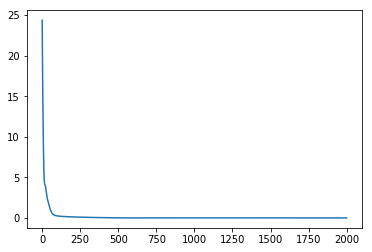

tensor([[ 0.9999,  1.9999],
        [ 2.9998,  3.9998],
        [ 4.9998,  7.9997]])


In [40]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

x_train = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y_train = torch.Tensor([[1, 2], [3, 4], [5, 8]])

input_size = 3
output_size = 2
num_epochs = 2000
learning_rate = 0.01

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = torch.nn.Linear(input_size, 64)
        self.layer2 = torch.nn.Linear(64, output_size)
        
    def forward(self, x):
        s1 = F.sigmoid(self.layer1(x))
        y_hat = self.layer2(s1)
        return y_hat
    
def test(model):
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    cost = []
    for epoch in range(num_epochs):
        y_hat = model(x_train)
        loss = criterion(y_hat, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cost.append(loss)

    plt.plot(cost)
    plt.show()
    
    print(model(x_train))

test(Model())

Epoch 2000, loss=0.076375
Epoch 4000, loss=0.076307
Epoch 6000, loss=0.076300
Epoch 8000, loss=0.076297
Epoch 10000, loss=0.076297
Epoch 12000, loss=0.076297
Epoch 14000, loss=0.076297
Epoch 16000, loss=0.076297
Epoch 18000, loss=0.076297
Epoch 20000, loss=0.076297


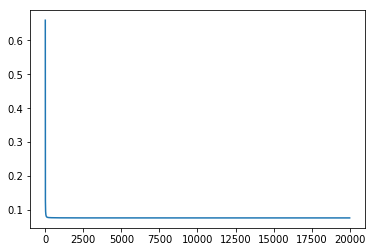

Test Accuracy = 97.60%


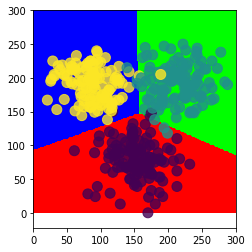

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import Dataset as dset
import MLP as mlp

%matplotlib inline  

data = dset.dset_3NO(500)
data.create()
training_rate = 0.75
x, y, tx, ty = data.get_data(training_rate)
dataset_size = int(data.classes * data.class_size * training_rate)

lossfn = mlp.nn_CrossEntropyLoss()
NN = mlp.nn_1layerNet(2, data.classes)
mlp.SGD(x, y, 64, NN, lossfn, num_epoch=20000, lr=1e-1)

test_acc = 0
test_num = data.class_size * data.classes - dataset_size
for i, test in enumerate(tx):
    if NN.predict(test) == np.argmax(ty[i, :]):
        test_acc = test_acc + 1

print ('Test Accuracy = %.2f%%' % (float(test_acc)/test_num*100))

img_size = 300
maxVal = np.max(x, axis=0)
minVal = np.min(x, axis=0)
img = np.zeros((img_size,img_size, 3))
pX, pY = np.arange(img_size), np.arange(img_size)
for px in pX:
    for py in pY:
        pdata = np.array([[px/(float(img_size)-1) * (maxVal[0]-minVal[0]) + minVal[0], py/(float(img_size)-1) * (maxVal[1]-minVal[1]) + minVal[1]]])
        i = NN.predict(pdata)
        img[py, px, :] = np.zeros((1,3))
        img[py, px, i] = 1

ox = np.zeros_like(tx)
olabel = np.zeros(tx.shape[0])
for i, ent in enumerate(tx):
    ox[i, 0] = int(((ent[0] - minVal[0]) / (maxVal[0]-minVal[0]))*(float(img_size)-1))
    ox[i, 1] = int(((ent[1] - minVal[1]) / (maxVal[1]-minVal[1]))*(float(img_size)-1))
    olabel[i] = np.argmax(ty[i])

plt.imshow(img, extent=[0,img_size,0,img_size], origin='lower')
plt.scatter(ox[:,0], ox[:,1], c=olabel, s=100, alpha=0.8)
plt.show()